In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc
from statsmodels.stats.multitest import multipletests
from scipy.stats import f_oneway
from statsmodels.tsa.arima.model import ARIMA

In [20]:
df1= pd.read_csv( 'all_products.csv')
df1

,product_name,year,month,us_city_average_retail_price,category
0,American Cheese,1984,1,2.485,Dairy Products
1,American Cheese,1984,2,2.495,Dairy Products
2,American Cheese,1984,3,2.493,Dairy Products
3,American Cheese,1984,4,2.501,Dairy Products
4,American Cheese,1984,5,2.472,Dairy Products
...,...,...,...,...,...
7123,Tomatoes,2022,8,1.890,Fruits
7124,Tomatoes,2022,9,1.901,Fruits
7125,Tomatoes,2022,10,1.974,Fruits
7126,Tomatoes,2022,11,2.107,Fruits


In [21]:
recent_years = df1[df1['year'] >= 2015]

In [22]:
df1

,product_name,year,month,us_city_average_retail_price,category
0,American Cheese,1984,1,2.485,Dairy Products
1,American Cheese,1984,2,2.495,Dairy Products
2,American Cheese,1984,3,2.493,Dairy Products
3,American Cheese,1984,4,2.501,Dairy Products
4,American Cheese,1984,5,2.472,Dairy Products
...,...,...,...,...,...
7123,Tomatoes,2022,8,1.890,Fruits
7124,Tomatoes,2022,9,1.901,Fruits
7125,Tomatoes,2022,10,1.974,Fruits
7126,Tomatoes,2022,11,2.107,Fruits


In [23]:
grouped = recent_years.groupby(['category', 'year'])['us_city_average_retail_price'].mean().reset_index()
grouped

,category,year,us_city_average_retail_price
0,Animal Products,2015,3.662578
1,Animal Products,2016,3.340315
2,Animal Products,2017,3.240491
3,Animal Products,2018,3.266806
4,Animal Products,2019,3.288443
5,Animal Products,2020,3.601098
6,Animal Products,2021,3.870447
7,Animal Products,2022,4.221625
8,Dairy Products,2015,4.417944
9,Dairy Products,2016,4.268639


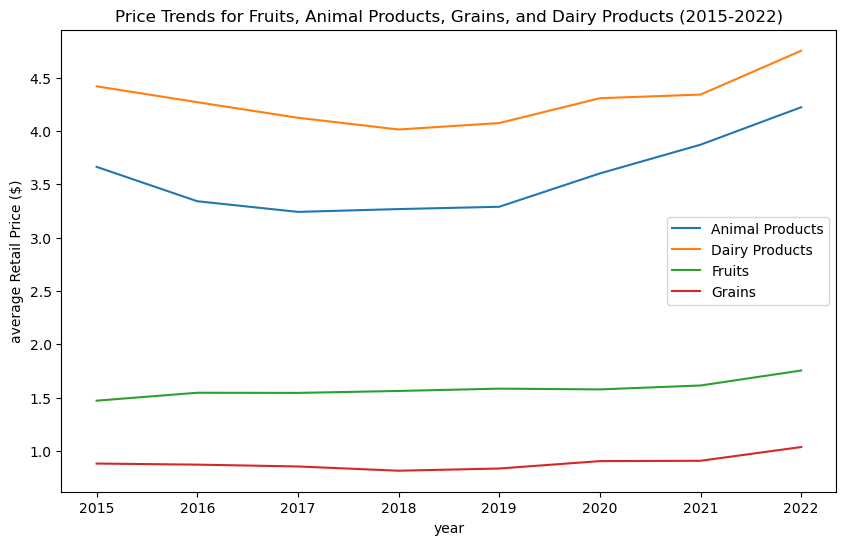

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

for category in grouped['category'].unique():
    category_df1 = grouped[grouped['category'] == category]
    ax.plot(category_df1['year'], category_df1['us_city_average_retail_price'], label=category)

ax.set_xlabel('year')
ax.set_ylabel('average Retail Price ($)')
ax.set_title('Price Trends for Fruits, Animal Products, Grains, and Dairy Products (2015-2022)')
ax.legend()
plt.show()

In [10]:
print(df1.describe())

              year        month  us_city_average_retail_price
count  7128.000000  7128.000000                   7128.000000
mean   2001.961420     6.457211                      1.935024
std      12.150859     3.450037                      1.428677
min    1980.000000     1.000000                      0.198000
25%    1992.000000     3.000000                      0.734000
50%    2002.000000     6.000000                      1.497000
75%    2012.000000     9.000000                      2.987500
max    2022.000000    12.000000                      7.489000


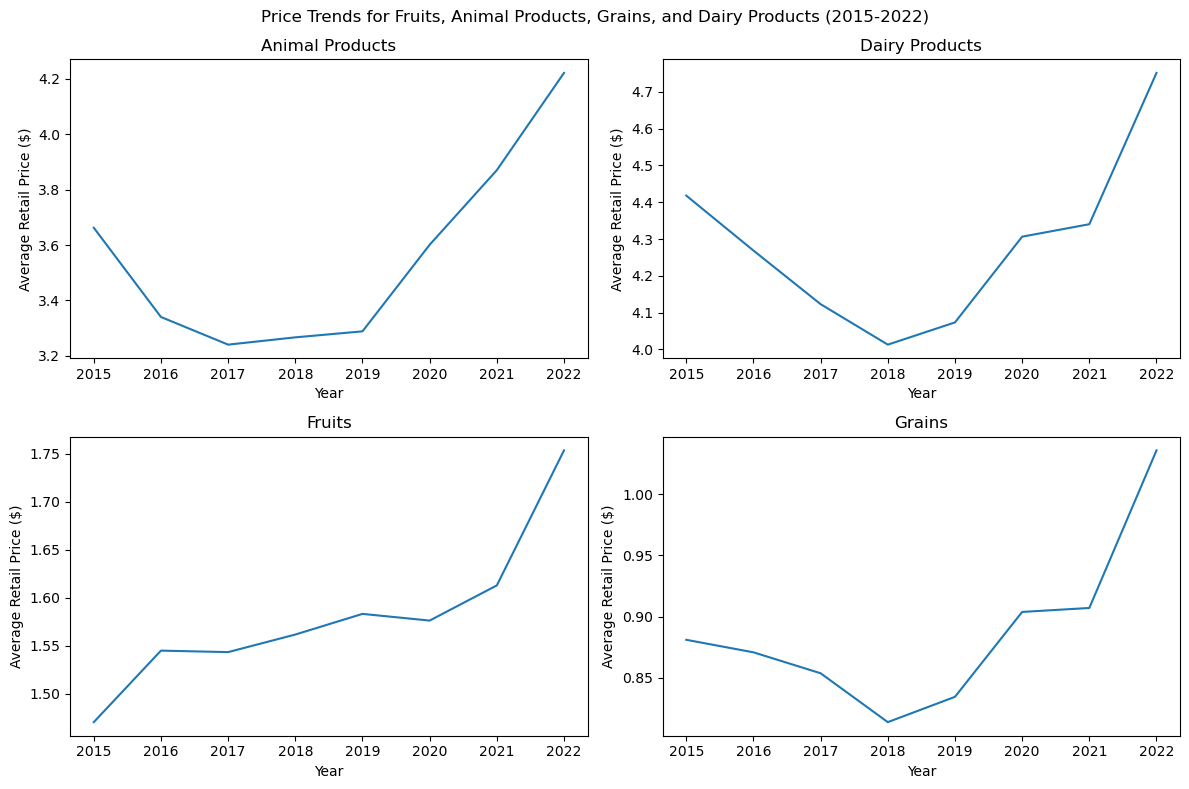

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, category in enumerate(grouped['category'].unique()):
    row = i // 2
    col = i % 2
    category_data = grouped[grouped['category'] == category]
    axs[row, col].plot(category_data['year'], category_data['us_city_average_retail_price'])
    axs[row, col].set_title(category)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Average Retail Price ($)')

plt.suptitle('Price Trends for Fruits, Animal Products, Grains, and Dairy Products (2015-2022)')
plt.tight_layout()
plt.show()

ANOVA results:
F-value: 438.1187134538429
P-value: 1.2667090036511296e-23


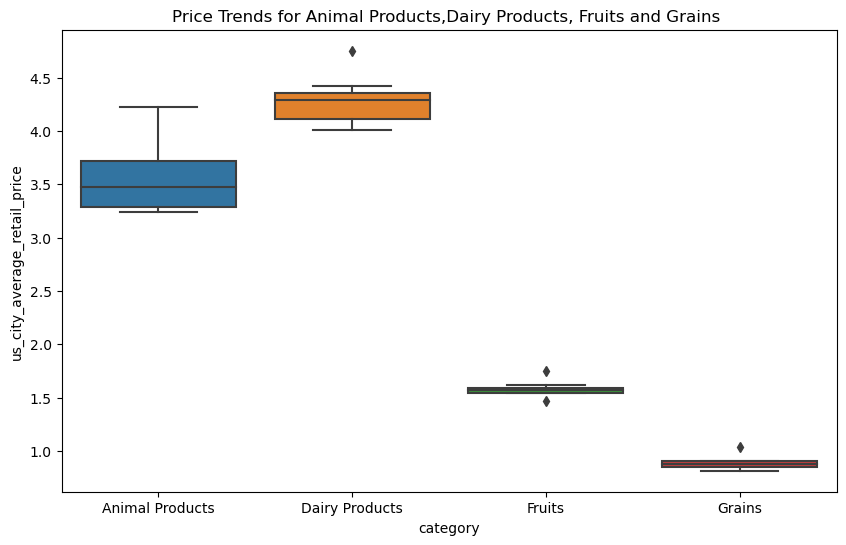

In [28]:
animal_products = grouped[grouped['category'] == 'Animal Products']['us_city_average_retail_price']
dairy_products = grouped[grouped['category'] == 'Dairy Products']['us_city_average_retail_price']
fruits = grouped[grouped['category'] == 'Fruits']['us_city_average_retail_price']
grains = grouped[grouped['category'] == 'Grains']['us_city_average_retail_price']
f_value, p_value = f_oneway(fruits, animal_products, grains, dairy_products)

# Print the ANOVA results
print('ANOVA results:')
print('F-value:', f_value)
print('P-value:', p_value)

# Create a box plot to visualize the distribution of prices for each category
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='category', y='us_city_average_retail_price', data=grouped, ax=ax)

# Add a title to the plot
ax.set_title('Price Trends for Animal Products,Dairy Products, Fruits and Grains ')

# Show the plot
plt.show()

In [14]:
# Perform Tukey's HSD test
tukey_results = mc.pairwise_tukeyhsd(grouped['us_city_average_retail_price'], grouped['category'])

# Print the results
print(tukey_results)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1         group2     meandiff p-adj  lower   upper  reject
--------------------------------------------------------------------
Animal Products Dairy Products   0.7252   0.0  0.4289  1.0215   True
Animal Products         Fruits  -1.9807   0.0  -2.277 -1.6844   True
Animal Products         Grains  -2.6739   0.0 -2.9702 -2.3777   True
 Dairy Products         Fruits  -2.7059   0.0 -3.0022 -2.4097   True
 Dairy Products         Grains  -3.3992   0.0 -3.6955 -3.1029   True
         Fruits         Grains  -0.6932   0.0 -0.9895 -0.3969   True
--------------------------------------------------------------------


In [17]:

# Perform Bonferroni correction
p_values = [f_value, p_value]
bonferroni_results = multipletests(p_values, alpha=0.05, method='bonferroni')

# Print the adjusted p-values
print(bonferroni_results[1])

[1.00000000e+00 2.53341801e-23]


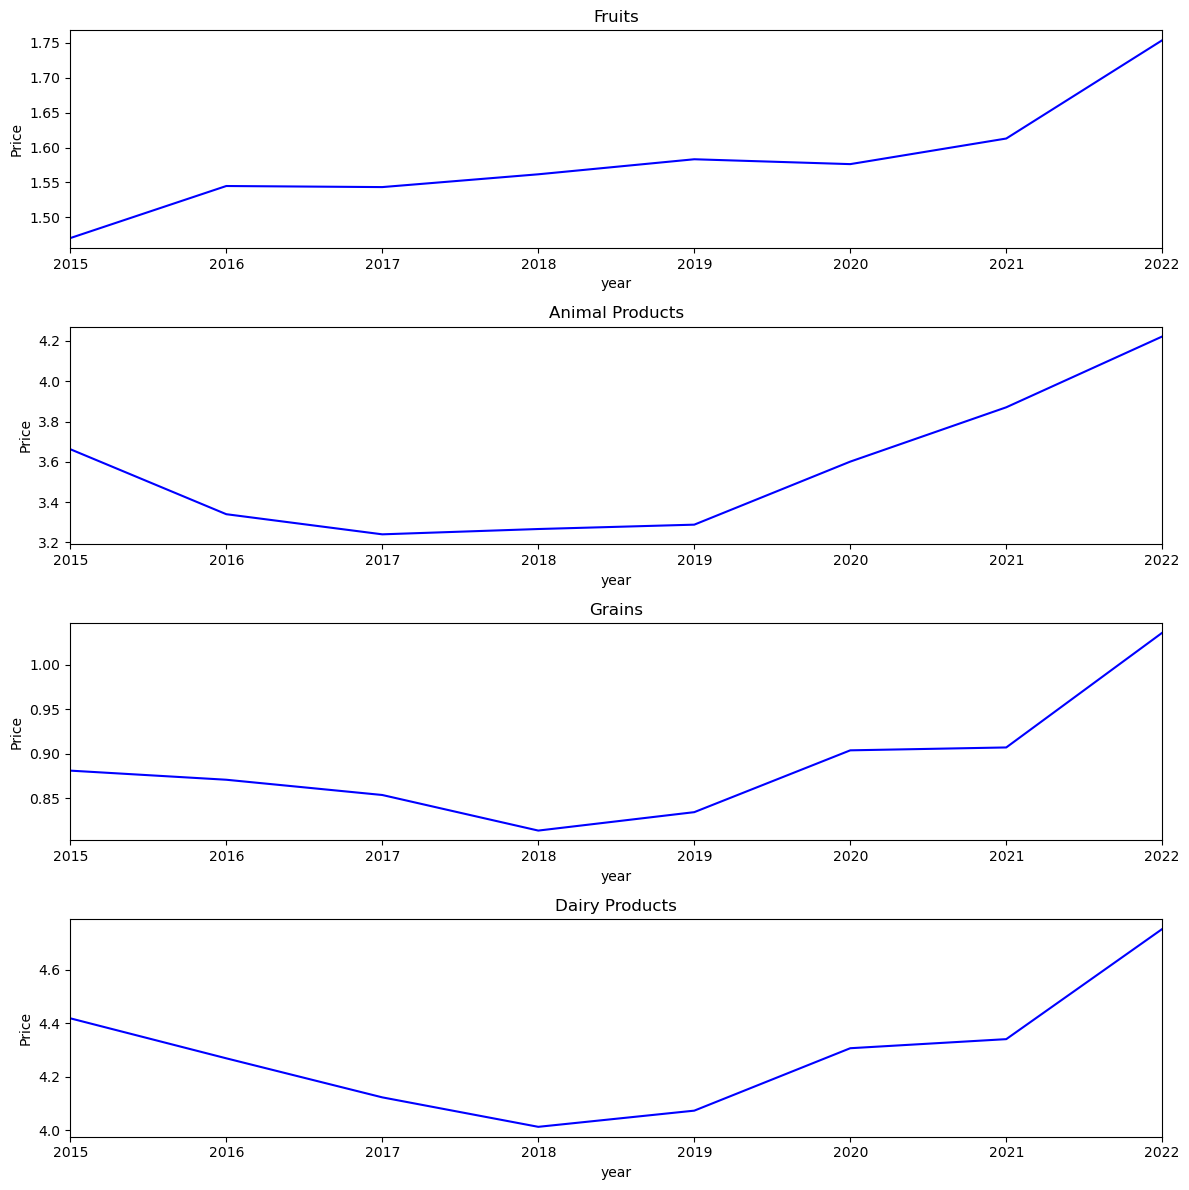

In [65]:
# Create a datetime index with yearly frequency starting from the first year in the data
future_dates = pd.date_range(start=time_series_data.index[-1], periods=5, freq='YS')

# Create a time series plot for each category to visualize the price trends over time
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))

for i, category in enumerate(['Fruits', 'Animal Products', 'Grains', 'Dairy Products']):
    category_data = grouped[grouped['category'] == category]
    time_series_data = pd.Series(category_data['us_city_average_retail_price'].values, index=pd.to_datetime(category_data['year'], format='%Y'))
    time_series_data.plot(ax=axs[i], color='b')
    axs[i].set_title(category)
    axs[i].set_ylabel('Price')

plt.tight_layout()
plt.show()



In [67]:
# Perform an ARIMA model fitting for each category
for category in ['Fruits', 'Animal Products', 'Grains', 'Dairy Products']:
    category_data = grouped[grouped['category'] == category]
    time_series_data = pd.Series(category_data['us_city_average_retail_price'].values, index=pd.to_datetime(category_data['year'], format='%Y'))
    model = ARIMA(time_series_data, order=(1,1,1))
    fitted_model = model.fit()
    print('Category:', category)
    print(fitted_model.summary())


C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimi

Category: Fruits
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  10.350
Date:                Wed, 29 Mar 2023   AIC                            -14.701
Time:                        15:33:54   BIC                            -14.863
Sample:                    01-01-2015   HQIC                           -16.706
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5366      1.013      0.530      0.596      -1.449       2.523
ma.L1          0.8031      1.979      0.406      0.685      -3.076       4.682
sigma2         0.0023      0.004   

C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [64]:
# Forecast future prices using the fitted ARIMA models
for category in ['Fruits', 'Animal Products', 'Grains', 'Dairy Products']:
    category_data = grouped[grouped['category'] == category]
    time_series_data = pd.Series(category_data['us_city_average_retail_price'].values, index=pd.to_datetime(category_data['year'], format='%Y'))
    model = ARIMA(time_series_data, order=(1,1,1))
    fitted_model = model.fit()
    future_dates = pd.date_range(start=time_series_data.index[-1], periods=5, freq='Y')
    forecast = fitted_model.forecast(steps=5)
    forecast.index = future_dates
    print('Category:', category)
    print('Forecasted prices:', forecast)


C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimi

Category: Fruits
Forecasted prices: 2022-12-31    1.898148
2023-12-31    1.975836
2024-12-31    2.017527
2025-12-31    2.039901
2026-12-31    2.051907
Freq: A-DEC, Name: predicted_mean, dtype: float64
Category: Animal Products
Forecasted prices: 2022-12-31    4.513921
2023-12-31    4.749972
2024-12-31    4.940601
2025-12-31    5.094549
2026-12-31    5.218873
Freq: A-DEC, Name: predicted_mean, dtype: float64
Category: Grains
Forecasted prices: 2022-12-31    1.073476
2023-12-31    1.099252
2024-12-31    1.116849
2025-12-31    1.128863
2026-12-31    1.137065
Freq: A-DEC, Name: predicted_mean, dtype: float64
Category: Dairy Products
Forecasted prices: 2022-12-31    4.947943
2023-12-31    5.085842
2024-12-31    5.182630
2025-12-31    5.250563
2026-12-31    5.298244
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [79]:
df2 = pd.read_csv('C:/Users/shuja/Downloads/github_2/Data_Mavericks_2023/processed_csv/all_products.csv', parse_dates=[['year', 'month']])
df2 = df2.set_index('year_month')

# Create dummy variables for category
dummy_vars = pd.get_dummies(df2['category'])
df2 = pd.concat([df2, dummy_vars], axis=1)

# Split data into training and testing sets
train = df2[df2.index < '2022-01-01']
test = df2[df2.index >= '2022-01-01']
train.head()




,product_name,us_city_average_retail_price,category,Animal Products,Dairy Products,Fruits,Grains
year_month,,,,,,,
1984-01-01,American Cheese,2.485,Dairy Products,0,1,0,0
1984-02-01,American Cheese,2.495,Dairy Products,0,1,0,0
1984-03-01,American Cheese,2.493,Dairy Products,0,1,0,0
1984-04-01,American Cheese,2.501,Dairy Products,0,1,0,0
1984-05-01,American Cheese,2.472,Dairy Products,0,1,0,0


In [82]:
# Define independent variables
X_train = train[['Fruits', 'Animal Products', 'Grains', 'Dairy Products']]
X_test = test[['Fruits' ,'Animal Products', 'Grains', 'Dairy Products']]

# Define dependent variable
y_train = train['us_city_average_retail_price']
y_test = test['us_city_average_retail_price']

# Fit time series regression model
model = sm.tsa.SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# Predict prices on testing set
preds = results.predict(start='2022-01-01', end='2022-12-01', exog=X_test)

# Plot actual and predicted prices
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(test.index, y_test, label='Actual')
ax.plot(test.index, preds, label='Predicted')
ax.legend()
plt.show()



C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shuja\anaconda3\lib\site-

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'